In [1]:
%matplotlib inline

In [2]:
import numpy as np
import xarray as xa
import matplotlib.pylab as plt
from hapi import fetch_by_ids, getColumns, db_begin, abundance,select, describeTable
from scipy.interpolate import UnivariateSpline
from pylab import figure,plot,xlabel,legend,ylabel,show,clf, subplot, title, xlim
from os.path import exists

#
def gauss(x,fwhm):
    sigma=fwhm/2./np.sqrt(2*np.log(2.))
    return (np.exp(-(x*x/2/sigma/sigma)))

def intensity(A,gp,gpp,nu):
    return 

HAPI version: 1.1.0.9.7
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


In [3]:
db_begin('dataoh')
fetch_by_ids ('OH',[48,49,50],1/1.8e-4,1/1.45e-4,ParameterGroups=['160-char','Labels'])


Using dataoh

OH
                     Lines parsed: 3553

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: OH
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
  65536 bytes written to dataoh/OH.data
Header written to dataoh/OH.header
END DOWNLOAD
                     Lines parsed: 3553
PROCESSED


In [4]:
describeTable('OH')

-----------------------------------------
OH summary:
-----------------------------------------
Comment: 
Contains lines for (16O)H,(18O)H,(16O)D
 in 5555.556-6896.552 wavenumber range
Number of rows: 3553
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mix

In [5]:
select('OH')

                                                                                                                                                       ElecStateLabel=X;Lambda=1;Omega=0.5;S=0.5;v=3;J=9.5;parity=+;kronigParity=f                                                                                                                                                                                    ElecStateLabel=X;Lambda=1;Omega=1.5;S=0.5;v=1;J=9.5;parity=-;kronigParity=e

131 6884.665764 1.451E-60 1.480E+01.04000.30019625.78580.660.000000       X1/2   7       X1/2   4                PP 19.5ff     232210 6 5 2 1 1 0    76.0   80.0                                                                                                                                                                                    ElecStateLabel=X;Lambda=1;Omega=0.5;S=0.5;v=7;J=18.5;parity=-;kronigParity=f                                                                                                     

In [6]:
![image.png](attachment:image.png)

/bin/bash: -c: line 0: syntax error near unexpected token `attachment:image.png'
/bin/bash: -c: line 0: `[image.png](attachment:image.png)'


= 4.815072906367325
Jp = 5.84428877022476
Jp = 3.0
Jp = 3.0
Jp = 5.84428877022476
Jp = 4.424428900898052
Jp = 4.424428900898052
Jp = 10.465856099730654
Jp = 3.5311288741492746
Jp = 3.5311288741492746
Jp = 4.0
Jp = 2.3722813232690143
Jp = 2.3722813232690143
Jp = 4.0
Jp = 5.520797289396148
Jp = 9.71028892833107
Jp = 9.512492197250394
Jp = 9.71028892833107
Jp = 9.512492197250394
Jp = 5.178908345800274
Jp = 5.520797289396148
Jp = 5.178908345800274
Jp = 12.0
Jp = 12.624404748406688
Jp = 9.512492197250394
Jp = 2.3722813232690143
Jp = 2.3722813232690143
Jp = 5.520797289396148
Jp = 5.178908345800274
Jp = 5.520797289396148
Jp = 12.624404748406688
Jp = 9.512492197250394
Jp = 4.815072906367325
Jp = 5.178908345800274
Jp = 4.815072906367325
Jp = 12.471121771072847
Jp = 10.465856099730654
Jp = 4.815072906367325
Jp = 1.5615528128088303
Jp = 1.5615528128088303
Jp = 9.512492197250394
Jp = 12.471121771072847
Jp = 9.310708435174291
Jp = 9.512492197250394
Jp = 9.310708435174291
Jp = 4.815072906367325
Jp =

Text(0.5, 0, 'Wavelength (nm)')

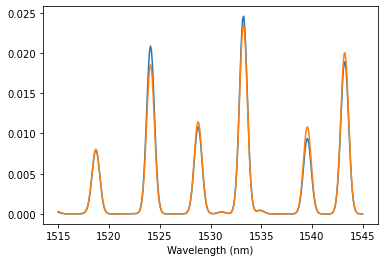

In [7]:
c2=1.4387770 # CM K
nu,iso,a,elow,gp,gpp = np.array(getColumns('OH',['nu','local_iso_id','a','elower','gp','gpp']))
upq=np.array(getColumns('OH',['global_upper_quanta'])[0])
eup=elow+nu #
wave=1e7/nu
wavelengths=np.arange(1.515e3,1.545e3,0.09)
#wavelengths=np.arange(1.45e3,1.8e3,0.09)
temps=(100,150,200,250,300,400)
#temps=(160, 180,200,220,540,600)
temps=(250,300,)
figure()
for temp in temps:
    spectrum = np.zeros(wavelengths.shape[0])
#    intens = gp*gp/gpp*a*np.exp(-c2*eup/temp)
    intens = gp*a*np.exp(-c2*eup/temp)*nu*nu
    intens /= intens.sum()
    for i in range(intens.shape[0]):  
        if int(upq[i][13:])==3:
            print('Jp = {}'.format(-0.5+np.sqrt(1+4*gp[i])/2))
            spectrum += intens[i]*gauss((wavelengths-wave[i]),0.9)
    plot(wavelengths, spectrum/spectrum.sum())
    #plot(wave,intens)
xlabel('Wavelength (nm)')

In [8]:
iri=xa.open_dataset('/home/anqil/Documents/sshfs/oso_extra_storage/StrayLightCorrected/Channel1/ir_slc_003713_ch1.nc')

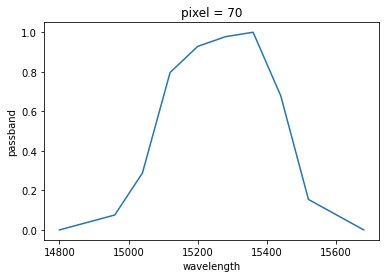

In [9]:
plt.figure()
iri.passband.isel(pixel=70).plot.line(x='wavelength')

In [10]:
filterpass=iri.passband.isel(pixel=70).data
filterwave=iri.wavelength.data/10

In [11]:
wavelengths=np.arange(1.45e3,1.8e3,0.09)
# wavelengths=np.arange(filterwave[0], filterwave[-1], 0.09)
passband=np.interp (wavelengths,filterwave,filterpass)

Overlap T = 150 : 0.011
Overlap T = 200 : 0.018
Overlap T = 250 : 0.026
Overlap T = 300 : 0.034
Overlap T = 350 : 0.042
Overlap T = 400 : 0.050


Text(0.5, 0, 'Wavelength [nm]')

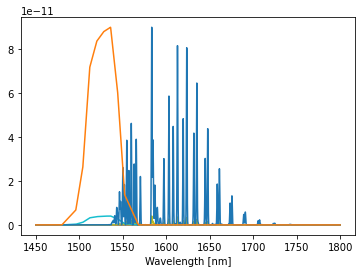

In [12]:
temps=(150, 200, 250, 300, 350, 400)
plt.figure()
for temp in temps:
    spectrum = np.zeros(wavelengths.shape[0])
#    intens = gp*gp/gpp*a*np.exp(-c2*eup/temp)
    intens = gp*a*np.exp(-c2*eup/temp)*nu*nu
    intens /= intens.sum()
    for i in range(intens.shape[0]):  
        if int(upq[i][13:])==4:
            spectrum += intens[i]*gauss((wavelengths-wave[i]),0.9)
    plot(wavelengths, spectrum, wavelengths, passband*spectrum.max())

    print ('Overlap T = {} : {:5.3f}'.format(temp, (spectrum*passband).sum()/spectrum.sum()))
xlabel('Wavelength [nm]')

In [27]:
# temps = np.array([150, 200, 250, 300, 350, 400])
temps = np.arange(150, 210, 5) #K 
ratio = []
spectra = []
for temp in temps:
    spectrum = np.zeros(wavelengths.shape[0])
    intens = gp*a*np.exp(-c2*eup/temp)*nu*nu
    intens /= intens.sum()
    for i in range(intens.shape[0]):  
        if int(upq[i][13:])==4:
            spectrum += intens[i]*gauss((wavelengths-wave[i]),0.9)
    spectra.append(spectrum)
    ratio.append((spectrum*passband).sum()/spectrum.sum())


In [28]:
ds4 = xa.Dataset(dict(spectrum=(('T', 'wavelength'), spectra),
                    T=(('T'), temps, dict(units='K')),
                    wavelength=(('wavelength',), wavelengths, dict(units='nm')),
                    ratio=(('T',), ratio),
                    passband=(('wavelength',), passband)
                    ))
                    

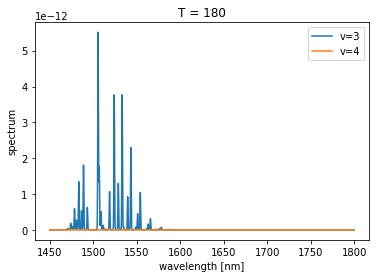

In [37]:
ds3.spectrum.sel(T=180).plot(label='v=3')
ds4.spectrum.sel(T=180).plot(yscale='linear', label='v=4')
plt.legend()

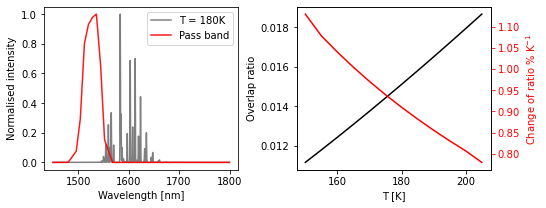

In [16]:
ds = xa.Dataset(dict(spectrum=(('T', 'wavelength'), spectra),
                    T=(('T'), temps, dict(units='K')),
                    wavelength=(('wavelength',), wavelengths, dict(units='nm')),
                    ratio=(('T',), ratio),
                    passband=(('wavelength',), passband)
                    ))
                    
fig, ax = plt.subplots(1,2, figsize=(8,3), gridspec_kw=dict(wspace=0.3))
plot_args = dict(ax=ax[0], x='wavelength', hue='T', yscale='linear')
(ds.spectrum/ds.spectrum.max('wavelength')).sel(T=180).plot(**plot_args, label='T = 180K', c='k', alpha=0.5)
ds.passband.plot(**plot_args, label='Pass band', c='r', alpha=0.9)
ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('Normalised intensity')
ax[0].legend()

# plot_args = dict(ax=ax[1], x='wavelength', hue='T', yscale='log')
# (ds.spectrum/ds.spectrum.max('wavelength')).sel(T=180).plot(**plot_args, label='spectrum T = 180K', c='k', alpha=0.5)
# ds.passband.plot(**plot_args, label='Pass band', c='r', alpha=0.9)
# ax[1].set_xlabel('Wavelength [nm]')
# ax[1].set_ylabel('Normalised intensity')
# ax[1].legend()

ds.ratio.plot(ax=ax[1], x='T', c='k')
ax[1].set_ylabel('Overlap ratio')
ax_twin=ax[1].twinx()
(ds.ratio.differentiate('T')/ds.ratio*100).plot(ax=ax_twin, x='T', c='r')
ax_twin.set_ylabel('Change of ratio % K$^{-1}$', c='r')
ax_twin.tick_params('y', colors='r')

In [17]:
peak_intensity_scia.sel(T=170)

<xarray.DataArray 'SCIA integrate / IRI' ()>
array(50814.18999117)
Coordinates:
    T        int64 170

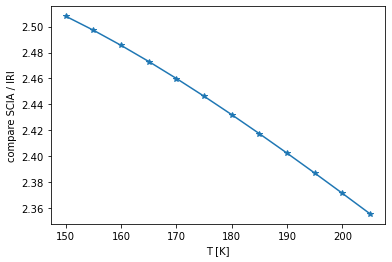

In [18]:
ratio_integrate = (ds.spectrum.sel(wavelength=slice(1515,1546)).integrate('wavelength')/ds.spectrum.sel(wavelength=slice(1450,1600)).integrate('wavelength')).rename('SCIA integrate / IRI')

peak_intensity_scia = 750 * (1546-1515)/ratio_integrate #750 is the max number on their colour scale (in photons cm-3 s-1 nm-1)
peak_intensity_iri = 125e3 #max on our color scale (in photons cm-3 s-1)
(peak_intensity_iri/peak_intensity_scia).rename('compare SCIA / IRI').plot(marker='*')

Text(1600, 1e-12, 'SCIA region / total = 0.458')

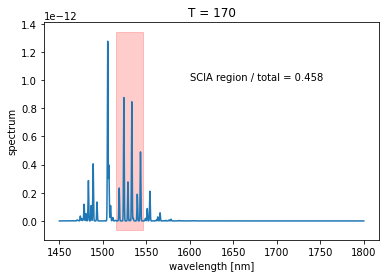

In [63]:
# ds.spectrum.isel(T=0).sel(wavelength=slice(1515,1546)).plot(x='wavelength')
ds.spectrum.isel(T=4).plot(x='wavelength')
plt.fill_betweenx(y=plt.gca().get_ylim(), x1=1515, x2=1546, alpha=0.2, color='r')
plt.text(1600, 1e-12, 'SCIA region / total = {}'.format(ratio_integrate.isel(T=4).values.round(3)))

0.5730483540868504

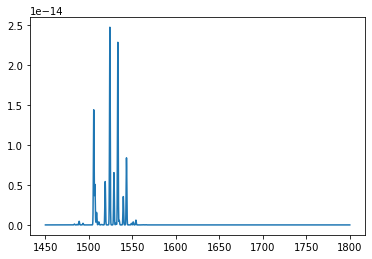

In [14]:
plt.figure()
plot(wavelengths,(spectrum*passband))
# (spectrum*passband).sum()/spectrum.sum()

In [178]:
passband.sum()

445.6183181569063